In [1]:
import numpy as np
import Elementos2D as BL4
import sympy as sp
import meshio
import Malha2D
import matplotlib.pyplot as plt

In [2]:
#Entrada de Dados - Avaliação do cisamento parasita

Materiais = {"MAT1":[10e3,0]}
apoios = {"ENGASTE":"engaste"}
cargas = [("CARGA",2,1)]

In [9]:
#Laço para geração do cálculo do deslocamento
arquivo = "barraFlexao.msh"
Uy = np.zeros((9,2))
TVMponta = np.zeros((9,2))

for i in range(1,10):
    n = i
    Malha2D.Gerar_viga_flexao(arquivo,L=1,h=0.1,nx=10*n,ny=n)
    nn, XY, ne, IJ, MAT, ESP, na, AP, nc, P = Malha2D.Processar_malha2D(arquivo,Materiais,apoios,cargas,espessura=0.1)

    #Monta Rigidez Global
    K_b = BL4.RigidezGlobal(nn,ne,MAT,ESP,XY,IJ,bolha=False)
    #Monta Força Global
    F_b = BL4.ForcapGlobal(nn,ESP,XY,IJ,nc,P)
    #Aplica as CChs homogêneas
    K_mod,F_mod = BL4.AplicaCCH(nn,na,AP,K_b,F_b)

    #Calcula o Deslocamento
    U = np.linalg.solve(K_mod,F_mod)
    Uy[i-1,0] = i
    Uy[i-1,1] = U[5]
    
    # sp.pprint(sp.latex(sp.Matrix(U)))


    #Calcula a Tensão ao longo dos elementos
    Sigma = BL4.CalculaTensaoMalha(nn,ne,MAT,ESP,XY,IJ,U)

    #Calcula Von Mises
    TVM = BL4.TensaoVonMises2D(ne,Sigma)
    #Calcula o Determinante do Jacobiano
    DetJ = BL4.CalculaDetJ(ne,XY,IJ)
    
    TVMponta[i-1,0] = i
    TVMponta[i-1,1] = max(TVM)
    
    Malha2D.Exporta_para_Gmsh(arquivo,IJ, XY, U, TVM,DetJ)
print(Uy)

C:\Users\jonhh\AppData\Local\Temp\ipykernel_30172\3952040536.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Uy[i-1,1] = U[5]







[[1.         2.68070711]
 [2.         3.57493411]
 [3.         3.81251062]
 [4.         3.90371522]
 [5.         3.94762762]
 [6.         3.97202873]
 [7.         3.98698143]
 [8.         3.99681712]
 [9.         4.00364372]]


In [10]:
n = 10
arquivo2 = "barraFlexaoBolha.msh"
UyB = np.zeros((9,2))
TVMpontaB = np.zeros((9,2))

for i in range(1,10):
    n = i
    Malha2D.Gerar_viga_flexao(arquivo2,L=1,h=0.1,nx=10*n,ny=n)
    nn, XY, ne, IJ, MAT, ESP, na, AP, nc, P = Malha2D.Processar_malha2D(arquivo2,Materiais,apoios,cargas,espessura=0.1)

    #Monta Rigidez Global
    K_b = BL4.RigidezGlobal(nn,ne,MAT,ESP,XY,IJ,bolha=True)
    #Monta Força Global
    F_b = BL4.ForcapGlobal(nn,ESP,XY,IJ,nc,P)
    #Aplica as CChs homogêneas
    K_mod,F_mod = BL4.AplicaCCH(nn,na,AP,K_b,F_b)

    #Calcula o Deslocamento
    U = np.linalg.solve(K_mod,F_mod)
    UyB[i-1,0] = i
    UyB[i-1,1] = U[5]

    #Calcula a Tensão ao longo dos elementos
    Sigma = BL4.CalculaTensaoMalha(nn,ne,MAT,ESP,XY,IJ,U,bolha=True)
    TVMpontaB[i-1,0] = i
    TVMpontaB[i-1,1] = max(TVM)

    DetJ = BL4.CalculaDetJ(ne,XY,IJ)

    #Calcula Von Mises
    TVM = BL4.TensaoVonMises2D(ne,Sigma)

    Malha2D.Exporta_para_Gmsh(arquivo2,IJ, XY, U, TVM,DetJ)


C:\Users\jonhh\AppData\Local\Temp\ipykernel_30172\2832051701.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  UyB[i-1,1] = U[5]


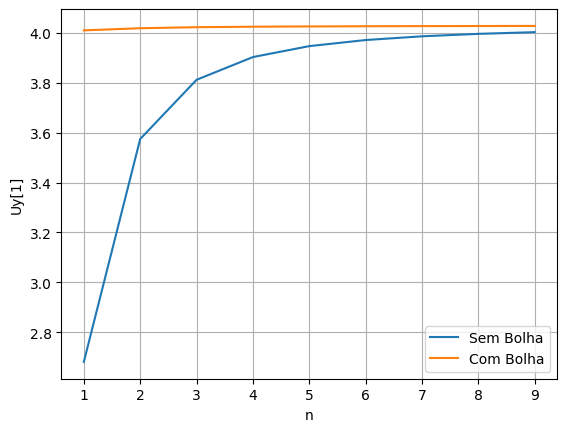

In [11]:
# Separa colunas
x = Uy[:, 0]
y1 = Uy[:, 1]
y2 = UyB[:, 1]

# Plota
plt.plot(x, y1, label=f'Sem Bolha')
plt.plot(x, y2, label=f'Com Bolha')
plt.xlabel("n")
plt.ylabel("Uy[1]")
plt.grid(True)
plt.legend()
plt.grid(True)
plt.show()

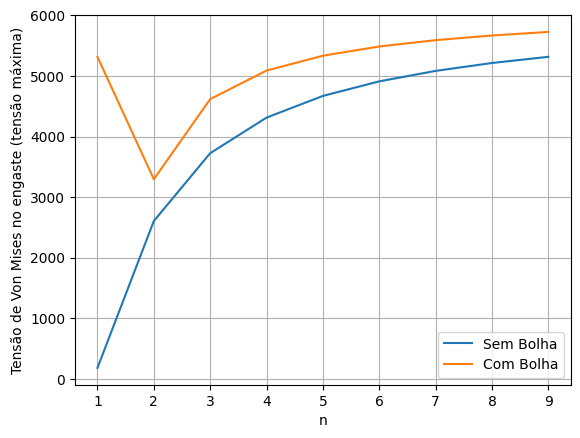

In [12]:
# Separa colunas
x = Uy[:, 0]
y1 = TVMponta[:, 1]
y2 = TVMpontaB[:, 1]

# Plota
plt.plot(x, y1, label=f'Sem Bolha')
plt.plot(x, y2, label=f'Com Bolha')
plt.xlabel("n")
plt.ylabel("Tensão de Von Mises no engaste (tensão máxima)")
plt.grid(True)
plt.legend()
plt.grid(True)
plt.show()

In [13]:
Malha2D.AbreVisualizacaoGmsh(arquivo)
Malha2D.AbreVisualizacaoGmsh(arquivo2)